# 1. Reading Data

In [2]:
# Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from sklearn import metrics
from sklearn.metrics import classification_report,recall_score,roc_auc_score,roc_curve,accuracy_score,precision_score,precision_recall_curve,confusion_matrix
import warnings
warnings.filterwarnings('ignore')

#Increasing the columns views limit
pd.options.display.max_columns = None
pd.options.display.max_rows = 150
pd.options.display.float_format = '{:.2f}'.format

In [3]:
# Importing data
df = pd.read_csv('Leads.csv')
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.00,0,0.00,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.00,15.00,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.00,674,2.50,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.00,15.00,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.00,1532,2.00,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.00,20.00,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.00,305,1.00,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.00,17.00,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.00,1428,1.00,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.00,18.00,No,No,Modified


In [4]:
# Checking Shape
df.shape

(9240, 37)

In [5]:
# Checking Columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [6]:
# Descibing DataFrame
df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.00,9240.00,9103.00,9240.00,9103.00,5022.00,5022.00
mean,617188.44,0.39,3.45,487.70,2.36,14.31,16.34
std,23406.00,0.49,4.85,548.02,2.16,1.39,1.81
min,579533.00,0.00,0.00,0.00,0.00,7.00,11.00
25%,596484.50,0.00,1.00,12.00,1.00,14.00,15.00
50%,615479.00,0.00,3.00,248.00,2.00,14.00,16.00
75%,637387.25,1.00,5.00,936.00,3.00,15.00,18.00
max,660737.00,1.00,251.00,2272.00,55.00,18.00,20.00


# 2. Data Cleaning

In [8]:
# Checking for nulls
df.isna().sum().sort_values(ascending = False)*100/9240

Lead Quality                                    51.59
Asymmetrique Activity Index                     45.65
Asymmetrique Profile Score                      45.65
Asymmetrique Activity Score                     45.65
Asymmetrique Profile Index                      45.65
Tags                                            36.29
Lead Profile                                    29.32
What matters most to you in choosing a course   29.32
What is your current occupation                 29.11
Country                                         26.63
How did you hear about X Education              23.89
Specialization                                  15.56
City                                            15.37
Page Views Per Visit                             1.48
TotalVisits                                      1.48
Last Activity                                    1.11
Lead Source                                      0.39
Receive More Updates About Our Courses           0.00
I agree to pay the amount th

In [9]:
# Dropping columns with more than 30% null data
# Also dropping Prospect ID and Lead Number as they dont add any value to the analysis
col_drop = ['Tags', 'Lead Quality', 'Asymmetrique Activity Index', 'Asymmetrique Profile Index', 'Asymmetrique Activity Score', 
            'Asymmetrique Profile Score', 'Prospect ID', 'Lead Number']

df.drop(col_drop, axis = 1, inplace = True)
df.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,0,0.00,0,0.00,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,Select,Select,No,No,Modified
1,API,Organic Search,No,No,0,5.00,674,2.50,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,Select,Select,No,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.00,1532,2.00,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,Potential Lead,Mumbai,No,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.00,305,1.00,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,Select,Mumbai,No,No,Modified
4,Landing Page Submission,Google,No,No,1,2.00,1428,1.00,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,Select,Mumbai,No,No,Modified


In [10]:
# Checking for nulls
df.isna().sum().sort_values(ascending = False)

Lead Profile                                     2709
What matters most to you in choosing a course    2709
What is your current occupation                  2690
Country                                          2461
How did you hear about X Education               2207
Specialization                                   1438
City                                             1420
TotalVisits                                       137
Page Views Per Visit                              137
Last Activity                                     103
Lead Source                                        36
Receive More Updates About Our Courses              0
Update me on Supply Chain Content                   0
Get updates on DM Content                           0
Lead Origin                                         0
Digital Advertisement                               0
I agree to pay the amount through cheque            0
A free copy of Mastering The Interview              0
Through Recommendations     

In [11]:
# Checking Country column
# Majority of the values in the column are India and replacing Nulls with mode (India) will have no impact hence we will drop the column
df['Country'].value_counts(dropna = False)

Country
India                   6492
NaN                     2461
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Bahrain                    7
Hong Kong                  7
Oman                       6
France                     6
unknown                    5
Kuwait                     4
South Africa               4
Canada                     4
Nigeria                    4
Germany                    4
Sweden                     3
Philippines                2
Uganda                     2
Italy                      2
Bangladesh                 2
Netherlands                2
Asia/Pacific Region        2
China                      2
Belgium                    2
Ghana                      2
Kenya                      1
Sri Lanka                  1
Tanzania                   1
Malaysia                   1
Liberia                    1
Switze

In [12]:
# Dropping Country Column
df.drop(['Country'], axis = 1, inplace = True)
df.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,0,0.00,0,0.00,Page Visited on Website,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,Select,Select,No,No,Modified
1,API,Organic Search,No,No,0,5.00,674,2.50,Email Opened,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,Select,Select,No,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.00,1532,2.00,Email Opened,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,Potential Lead,Mumbai,No,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.00,305,1.00,Unreachable,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,Select,Mumbai,No,No,Modified
4,Landing Page Submission,Google,No,No,1,2.00,1428,1.00,Converted to Lead,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,Select,Mumbai,No,No,Modified


In [13]:
# Checking City column
# Majority of the values in the column are Mumbai or neighboring region and replacing Nulls with mode (Mumbai) will have no impact hence we will drop the column
df['City'].value_counts(dropna = False)

City
Mumbai                         3222
Select                         2249
NaN                            1420
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: count, dtype: int64

In [14]:
# Dropping City Column
df.drop(['City'], axis = 1, inplace = True)
df.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,0,0.00,0,0.00,Page Visited on Website,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,Select,No,No,Modified
1,API,Organic Search,No,No,0,5.00,674,2.50,Email Opened,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,Select,No,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.00,1532,2.00,Email Opened,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,Potential Lead,No,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.00,305,1.00,Unreachable,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,Select,No,No,Modified
4,Landing Page Submission,Google,No,No,1,2.00,1428,1.00,Converted to Lead,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,Select,No,No,Modified


In [15]:
# Checking Specialization column
df['Specialization'].value_counts(dropna = False)

Specialization
Select                               1942
NaN                                  1438
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: count, dtype: int64

In [16]:
# Replacing Select and NaN with 'Not Available' as not every lead would have a Specialization
df['Specialization'] = df['Specialization'].fillna('Not Available')
df.loc[df['Specialization'] == 'Select','Specialization'] = 'Not Available'
df['Specialization'].value_counts(dropna = False)

Specialization
Not Available                        3380
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: count, dtype: int64

In [17]:
# Grouping data in Specialization Column

specialization_groups = {
    'Not Available': 'Not Available',
    'Business Administration': 'General Management',
    'Operations Management': 'General Management',
    'Services Excellence': 'General Management',
    'Finance Management': 'Finance and Banking',
    'Banking, Investment And Insurance': 'Finance and Banking',
    'Human Resource Management': 'Human Resources',
    'Marketing Management': 'Marketing and Advertising',
    'Media and Advertising': 'Marketing and Advertising',
    'IT Projects Management': 'Technology and IT',
    'E-COMMERCE': 'Technology and IT',
    'E-Business': 'Technology and IT',
    'Supply Chain Management': 'Supply Chain and Operations',
    'Retail Management': 'Supply Chain and Operations',
    'Travel and Tourism': 'Travel and Hospitality',
    'Hospitality Management': 'Travel and Hospitality',
    'Healthcare Management': 'Healthcare and Specialized Sectors',
    'Rural and Agribusiness': 'Healthcare and Specialized Sectors',
    'International Business': 'International Business'
}


df['Specialization_Group'] = df['Specialization'].map(specialization_groups)
df.drop(['Specialization'], axis = 1, inplace = True)


In [18]:
df['Specialization_Group'].value_counts()

Specialization_Group
Not Available                         3380
Finance and Banking                   1314
Marketing and Advertising             1041
General Management                     946
Human Resources                        848
Technology and IT                      535
Supply Chain and Operations            449
Travel and Hospitality                 317
Healthcare and Specialized Sectors     232
International Business                 178
Name: count, dtype: int64

In [19]:
# Checking 'What matters most to you in choosing a course' column
# Majority of the values in the column are Better Career Prospects and replacing Nulls with mode (Better Career Prospects) or dropping these rows will create a huge data imbalance and will have no impact hence we will drop the column
df['What matters most to you in choosing a course'].value_counts(dropna=False)

What matters most to you in choosing a course
Better Career Prospects      6528
NaN                          2709
Flexibility & Convenience       2
Other                           1
Name: count, dtype: int64

In [20]:
# Dropping 'What matters most to you in choosing a course' column
df.drop(['What matters most to you in choosing a course'], axis = 1 , inplace = True)
df.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,How did you hear about X Education,What is your current occupation,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity,Specialization_Group
0,API,Olark Chat,No,No,0,0.00,0,0.00,Page Visited on Website,Select,Unemployed,No,No,No,No,No,No,No,No,No,No,Select,No,No,Modified,Not Available
1,API,Organic Search,No,No,0,5.00,674,2.50,Email Opened,Select,Unemployed,No,No,No,No,No,No,No,No,No,No,Select,No,No,Email Opened,Not Available
2,Landing Page Submission,Direct Traffic,No,No,1,2.00,1532,2.00,Email Opened,Select,Student,No,No,No,No,No,No,No,No,No,No,Potential Lead,No,Yes,Email Opened,General Management
3,Landing Page Submission,Direct Traffic,No,No,0,1.00,305,1.00,Unreachable,Word Of Mouth,Unemployed,No,No,No,No,No,No,No,No,No,No,Select,No,No,Modified,Marketing and Advertising
4,Landing Page Submission,Google,No,No,1,2.00,1428,1.00,Converted to Lead,Other,Unemployed,No,No,No,No,No,No,No,No,No,No,Select,No,No,Modified,Not Available


In [21]:
# Checking 'What is your current occupation' column
df['What is your current occupation'].value_counts(dropna=False)

What is your current occupation
Unemployed              5600
NaN                     2690
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: count, dtype: int64

In [22]:
# The column could have impact on the lead converion hence we will drop the null values
df = df[~df['What is your current occupation'].isna()]
df.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,How did you hear about X Education,What is your current occupation,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity,Specialization_Group
0,API,Olark Chat,No,No,0,0.00,0,0.00,Page Visited on Website,Select,Unemployed,No,No,No,No,No,No,No,No,No,No,Select,No,No,Modified,Not Available
1,API,Organic Search,No,No,0,5.00,674,2.50,Email Opened,Select,Unemployed,No,No,No,No,No,No,No,No,No,No,Select,No,No,Email Opened,Not Available
2,Landing Page Submission,Direct Traffic,No,No,1,2.00,1532,2.00,Email Opened,Select,Student,No,No,No,No,No,No,No,No,No,No,Potential Lead,No,Yes,Email Opened,General Management
3,Landing Page Submission,Direct Traffic,No,No,0,1.00,305,1.00,Unreachable,Word Of Mouth,Unemployed,No,No,No,No,No,No,No,No,No,No,Select,No,No,Modified,Marketing and Advertising
4,Landing Page Submission,Google,No,No,1,2.00,1428,1.00,Converted to Lead,Other,Unemployed,No,No,No,No,No,No,No,No,No,No,Select,No,No,Modified,Not Available


In [23]:
df.shape

(6550, 26)

In [24]:
# Checking TotalVisits column
df['TotalVisits'].value_counts(dropna=False)

TotalVisits
0.00      1375
2.00      1228
3.00       940
4.00       825
5.00       578
6.00       337
1.00       270
7.00       225
8.00       163
NaN        130
9.00       128
10.00       76
11.00       70
13.00       39
12.00       31
14.00       28
16.00       16
15.00       14
17.00       12
18.00       12
20.00       10
19.00        6
21.00        5
23.00        5
27.00        5
25.00        3
24.00        3
22.00        3
29.00        2
26.00        2
55.00        1
30.00        1
43.00        1
74.00        1
115.00       1
251.00       1
32.00        1
28.00        1
42.00        1
Name: count, dtype: int64

In [25]:
# The column could have impact on the lead converion hence we will drop the null values
df = df[~df['TotalVisits'].isna()]
df.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,How did you hear about X Education,What is your current occupation,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity,Specialization_Group
0,API,Olark Chat,No,No,0,0.00,0,0.00,Page Visited on Website,Select,Unemployed,No,No,No,No,No,No,No,No,No,No,Select,No,No,Modified,Not Available
1,API,Organic Search,No,No,0,5.00,674,2.50,Email Opened,Select,Unemployed,No,No,No,No,No,No,No,No,No,No,Select,No,No,Email Opened,Not Available
2,Landing Page Submission,Direct Traffic,No,No,1,2.00,1532,2.00,Email Opened,Select,Student,No,No,No,No,No,No,No,No,No,No,Potential Lead,No,Yes,Email Opened,General Management
3,Landing Page Submission,Direct Traffic,No,No,0,1.00,305,1.00,Unreachable,Word Of Mouth,Unemployed,No,No,No,No,No,No,No,No,No,No,Select,No,No,Modified,Marketing and Advertising
4,Landing Page Submission,Google,No,No,1,2.00,1428,1.00,Converted to Lead,Other,Unemployed,No,No,No,No,No,No,No,No,No,No,Select,No,No,Modified,Not Available


In [26]:
# Checking for nulls
df.isna().sum().sort_values(ascending = False)

Lead Source                                 29
Lead Profile                                19
How did you hear about X Education          19
Lead Origin                                  0
X Education Forums                           0
Last Notable Activity                        0
A free copy of Mastering The Interview       0
I agree to pay the amount through cheque     0
Get updates on DM Content                    0
Update me on Supply Chain Content            0
Receive More Updates About Our Courses       0
Through Recommendations                      0
Digital Advertisement                        0
Newspaper                                    0
Newspaper Article                            0
Magazine                                     0
Search                                       0
What is your current occupation              0
Last Activity                                0
Page Views Per Visit                         0
Total Time Spent on Website                  0
TotalVisits  

In [27]:
# We will drop Null values of Lead Source, Lead Profile and How did you hear about X Education
df = df[~df['Lead Source'].isna()]
df = df[~df['Lead Profile'].isna()]
df = df[~df['How did you hear about X Education'].isna()]
df.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,How did you hear about X Education,What is your current occupation,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity,Specialization_Group
0,API,Olark Chat,No,No,0,0.00,0,0.00,Page Visited on Website,Select,Unemployed,No,No,No,No,No,No,No,No,No,No,Select,No,No,Modified,Not Available
1,API,Organic Search,No,No,0,5.00,674,2.50,Email Opened,Select,Unemployed,No,No,No,No,No,No,No,No,No,No,Select,No,No,Email Opened,Not Available
2,Landing Page Submission,Direct Traffic,No,No,1,2.00,1532,2.00,Email Opened,Select,Student,No,No,No,No,No,No,No,No,No,No,Potential Lead,No,Yes,Email Opened,General Management
3,Landing Page Submission,Direct Traffic,No,No,0,1.00,305,1.00,Unreachable,Word Of Mouth,Unemployed,No,No,No,No,No,No,No,No,No,No,Select,No,No,Modified,Marketing and Advertising
4,Landing Page Submission,Google,No,No,1,2.00,1428,1.00,Converted to Lead,Other,Unemployed,No,No,No,No,No,No,No,No,No,No,Select,No,No,Modified,Not Available


In [28]:
# Checking for nulls
df.isna().sum().sort_values(ascending = False)

Lead Origin                                 0
Lead Source                                 0
Last Notable Activity                       0
A free copy of Mastering The Interview      0
I agree to pay the amount through cheque    0
Lead Profile                                0
Get updates on DM Content                   0
Update me on Supply Chain Content           0
Receive More Updates About Our Courses      0
Through Recommendations                     0
Digital Advertisement                       0
Newspaper                                   0
X Education Forums                          0
Newspaper Article                           0
Magazine                                    0
Search                                      0
What is your current occupation             0
How did you hear about X Education          0
Last Activity                               0
Page Views Per Visit                        0
Total Time Spent on Website                 0
TotalVisits                       

In [29]:
df.shape

(6372, 26)

In [30]:
col_list = ['Do Not Email', 'Do Not Call', 'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper', 'Through Recommendations', 
            'Receive More Updates About Our Courses', 'Update me on Supply Chain Content', 'Get updates on DM Content', 
            'I agree to pay the amount through cheque']
for col in col_list:
    print(f"Value counts for '{col}':")
    print(df[col].value_counts(normalize = True)*100)
    print("\n" + "-"*50 + "\n")

Value counts for 'Do Not Email':
Do Not Email
No    93.19
Yes    6.81
Name: proportion, dtype: float64

--------------------------------------------------

Value counts for 'Do Not Call':
Do Not Call
No    99.97
Yes    0.03
Name: proportion, dtype: float64

--------------------------------------------------

Value counts for 'Magazine':
Magazine
No   100.00
Name: proportion, dtype: float64

--------------------------------------------------

Value counts for 'Newspaper Article':
Newspaper Article
No    99.98
Yes    0.02
Name: proportion, dtype: float64

--------------------------------------------------

Value counts for 'X Education Forums':
X Education Forums
No   100.00
Name: proportion, dtype: float64

--------------------------------------------------

Value counts for 'Newspaper':
Newspaper
No    99.98
Yes    0.02
Name: proportion, dtype: float64

--------------------------------------------------

Value counts for 'Through Recommendations':
Through Recommendations
No    99.91
Ye

In [31]:
#Dropping the above columns as most of the values are 'No' and as per reseach they should not affect the lead conversion.
df.drop(col_list, axis = 1, inplace = True)

# 3. Expolatory Data Analysis

In [33]:
# Creating List of numerical and object columns
num_col = df.select_dtypes(include = ['int','float']).columns.tolist()
obj_col = df.select_dtypes(exclude = ['int','float','datetime64']).columns.tolist()

In [34]:
num_col

['Converted',
 'TotalVisits',
 'Total Time Spent on Website',
 'Page Views Per Visit']

In [35]:
obj_col

['Lead Origin',
 'Lead Source',
 'Last Activity',
 'How did you hear about X Education',
 'What is your current occupation',
 'Search',
 'Digital Advertisement',
 'Lead Profile',
 'A free copy of Mastering The Interview',
 'Last Notable Activity',
 'Specialization_Group']

## EDA of Numerical Variables

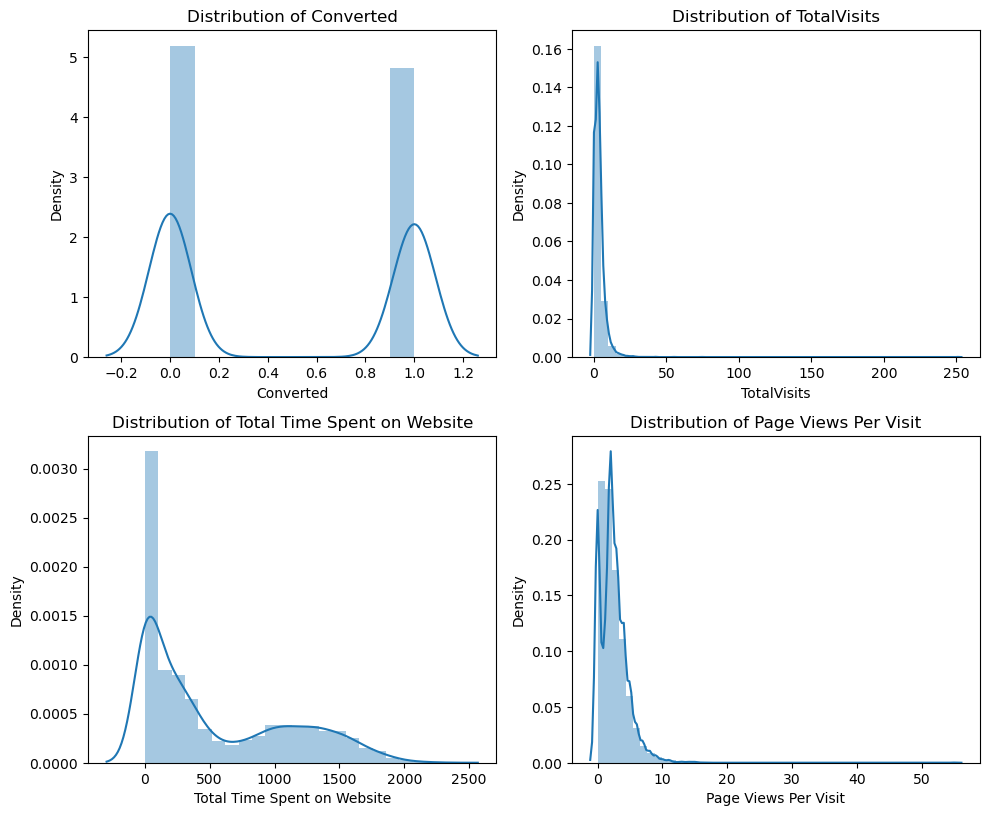

In [37]:
# EDA for numerical columns
plt.figure(figsize = (10,20))
for i, col in enumerate(num_col,1):
    plt.subplot(5, 2, i)
    sns.distplot(df[col])
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

1. There is no data imbalance. The amount of converted and non-converted leads are similar.
2. TotalVisits and Page Views Per Visit have upper limit outliers

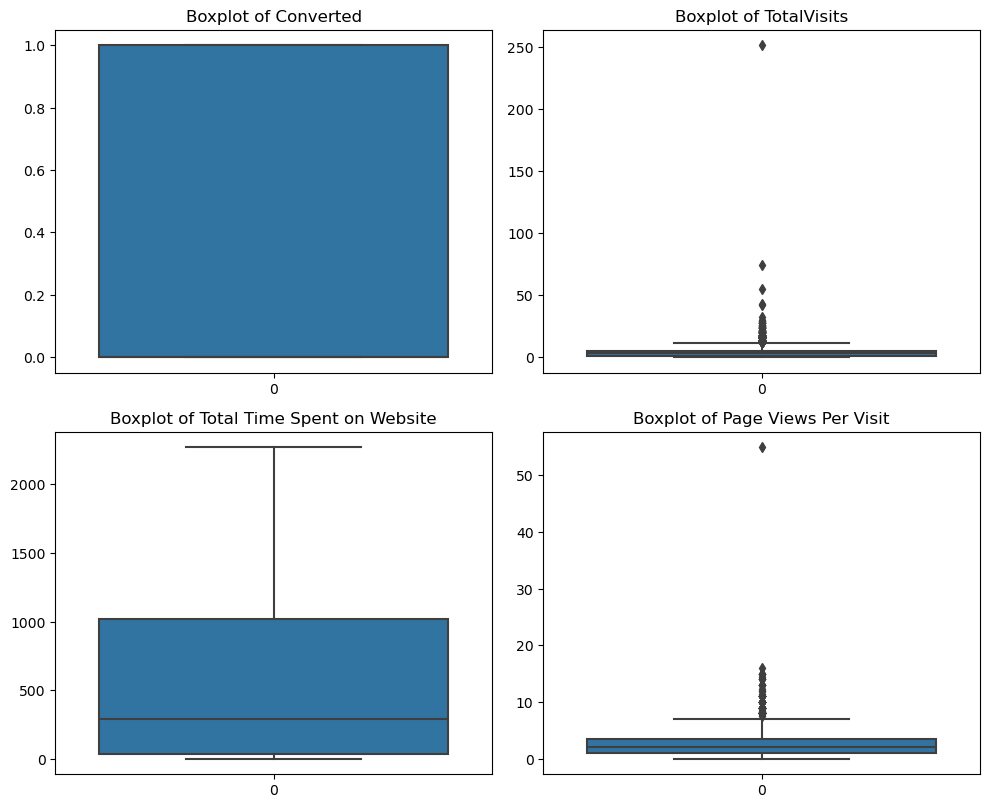

In [39]:
# Creating Boxplot for numerical columns
plt.figure(figsize = (10,20))
for i,col in enumerate(num_col,1):
    plt.subplot(5,2,i)
    sns.boxplot(df[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

In [40]:
# Checking Percentiles for outliers
df.describe(percentiles = [0.25, 0.5, 0.75, 0.9, 0.95, 0.99])

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,6372.00,6372.00,6372.00,6372.00
mean,0.48,3.61,535.28,2.48
std,0.50,4.85,565.40,2.17
min,0.00,0.00,0.00,0.00
25%,0.00,1.00,34.00,1.00
50%,0.00,3.00,287.00,2.00
75%,1.00,5.00,1022.25,3.50
90%,1.00,8.00,1428.90,5.00
95%,1.00,10.00,1592.45,6.00
99%,1.00,17.29,1849.29,9.00


In [41]:
# Cheacking the upper extreme of TotalVisits
df.TotalVisits.quantile([0.5])[0.5] + 1.5*(df.TotalVisits.quantile([0.75])[0.75] - df.TotalVisits.quantile([0.25])[0.25])

9.0

In [42]:
#Calculating quantiles to see what percentile of data is within the limit
df.TotalVisits.quantile([0.9,0.95,0.99])

0.90    8.00
0.95   10.00
0.99   17.29
Name: TotalVisits, dtype: float64

In [43]:
# Count of outliers for TotalVisits
df[df.TotalVisits > 9].TotalVisits.count() 

350

In [44]:
# Count of outliers for TotalVisits
df[df.TotalVisits > 10].TotalVisits.count() 

274

In [45]:
# Checking outlier records
df[df.TotalVisits > 9].sort_values(by = 'TotalVisits', ascending = False).head()

,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,How did you hear about X Education,What is your current occupation,Search,Digital Advertisement,Lead Profile,A free copy of Mastering The Interview,Last Notable Activity,Specialization_Group
6102,Landing Page Submission,Direct Traffic,1,251.00,49,1.48,Page Visited on Website,Select,Unemployed,No,No,Select,Yes,Page Visited on Website,Supply Chain and Operations
5283,Landing Page Submission,Direct Traffic,0,74.00,1209,12.33,Page Visited on Website,Advertisements,Unemployed,No,No,Select,No,Page Visited on Website,Not Available
2190,Landing Page Submission,Direct Traffic,0,55.00,297,55.00,Page Visited on Website,Select,Unemployed,No,No,Select,Yes,Modified,Technology and IT
1160,Landing Page Submission,Direct Traffic,0,43.00,57,3.91,Email Opened,Online Search,Unemployed,No,No,Other Leads,No,Email Opened,Marketing and Advertising
8230,Landing Page Submission,Direct Traffic,0,42.00,1148,3.82,Page Visited on Website,Online Search,Unemployed,No,No,Other Leads,No,Modified,Not Available


In [46]:
# Dropping records greater than 95th percentile
df = df[df['TotalVisits'] <= 10]
df.shape

(6098, 15)

In [47]:
# Cheacking the upper extreme of 'Page Views Per Visit'
df['Page Views Per Visit'].quantile([0.5])[0.5] + 1.5*(df['Page Views Per Visit'].quantile([0.75])[0.75] - df['Page Views Per Visit'].quantile([0.25])[0.25])

5.0

In [48]:
#Calculating quantiles to see what percentile of data is within the limit
df['Page Views Per Visit'].quantile([0.9,0.95,0.99])

0.90   5.00
0.95   6.00
0.99   8.00
Name: Page Views Per Visit, dtype: float64

In [49]:
# Count of outliers for 'Page Views Per Visit'
df[df['Page Views Per Visit'] > 5]['Page Views Per Visit'].count()

379

In [50]:
# Count of outliers for 'Page Views Per Visit'
df[df['Page Views Per Visit'] > 6]['Page Views Per Visit'].count()

207

In [51]:
# Checking outlier records
df[df['Page Views Per Visit'] > 9].sort_values(by = 'Page Views Per Visit', ascending = False).head(5)

,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,How did you hear about X Education,What is your current occupation,Search,Digital Advertisement,Lead Profile,A free copy of Mastering The Interview,Last Notable Activity,Specialization_Group
375,API,Referral Sites,0,10.00,66,10.00,Email Opened,Select,Unemployed,No,No,Select,No,Modified,Not Available
961,Landing Page Submission,Direct Traffic,0,10.00,824,10.00,Page Visited on Website,Select,Unemployed,No,No,Select,Yes,Page Visited on Website,Travel and Hospitality
997,API,Google,1,10.00,764,10.00,Email Opened,Select,Working Professional,No,No,Lateral Student,No,Email Opened,Human Resources
1437,Landing Page Submission,Google,1,10.00,1467,10.00,Email Opened,Select,Unemployed,No,No,Potential Lead,Yes,Email Opened,General Management
1812,Landing Page Submission,Google,1,10.00,1026,10.00,SMS Sent,Other,Unemployed,No,No,Select,Yes,SMS Sent,Supply Chain and Operations


In [52]:
# Dropping records greater than 95th percentile
df = df[df['Page Views Per Visit'] <= 6]
df.shape

(5891, 15)

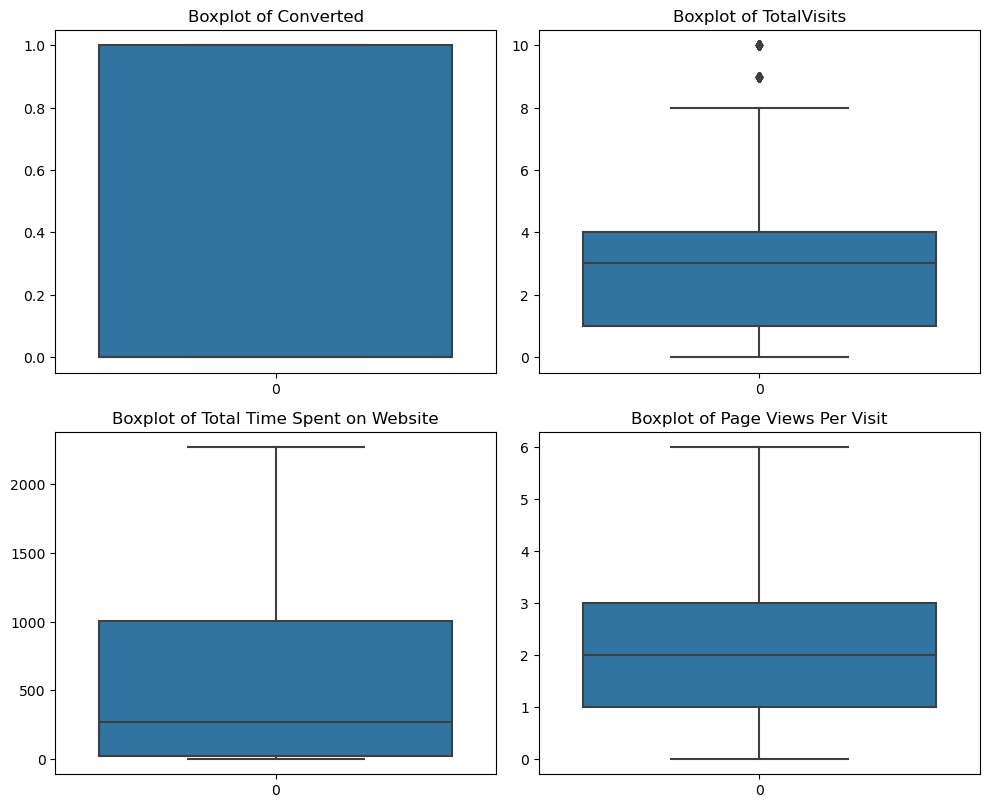

In [53]:
# Creating Boxplot for numerical columns
plt.figure(figsize = (10,20))
for i,col in enumerate(num_col,1):
    plt.subplot(5,2,i)
    sns.boxplot(df[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

## EDA of Categorical Variables

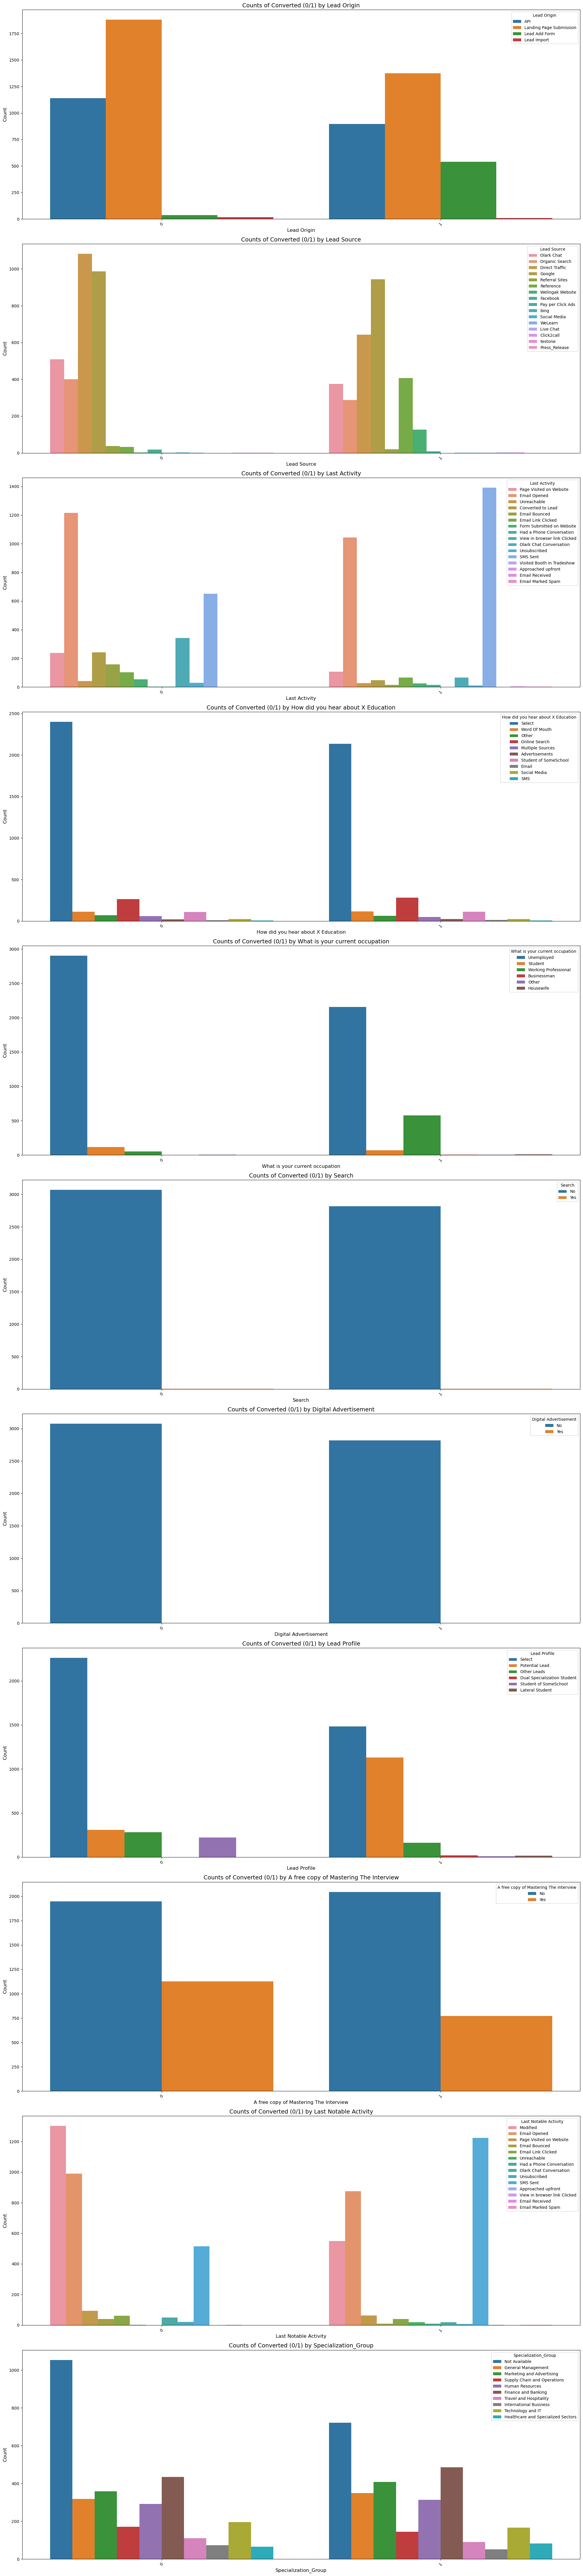

In [55]:
# EDA for categorical columns
plt.figure(figsize=(20, 88))

for i, col in enumerate(obj_col, 1):
    plt.subplot(len(obj_col), 1, i)
    sns.countplot(data=df, x='Converted', hue=col)
    plt.title(f"Counts of Converted (0/1) by {col}", fontsize=14)
    plt.xticks(rotation=45)
    plt.xlabel(col, fontsize=12)
    plt.ylabel('Count', fontsize=12)

plt.tight_layout()
plt.show()

In [56]:
for col in obj_col:
    count_table = df.groupby([col, 'Converted']).size().unstack(fill_value=0)
    print(f"\nValue counts for 'Converted' by {col}:")
    print(count_table)
    print("\n" + "-"*50)


Value counts for 'Converted' by Lead Origin:
Converted                   0     1
Lead Origin                        
API                      1140   895
Landing Page Submission  1880  1374
Lead Add Form              37   539
Lead Import                17     9

--------------------------------------------------

Value counts for 'Converted' by Lead Source:
Converted             0    1
Lead Source                 
Click2call            1    2
Direct Traffic     1082  642
Facebook             18    9
Google              987  943
Live Chat             0    2
Olark Chat          508  375
Organic Search      400  288
Pay per Click Ads     1    0
Press_Release         1    0
Reference            33  407
Referral Sites       37   20
Social Media          1    1
WeLearn               0    1
Welingak Website      2  126
bing                  2    1
testone               1    0

--------------------------------------------------

Value counts for 'Converted' by Last Activity:
Converted         

In [57]:
for col in obj_col:
    # Generate value counts for each category within the column, grouped by 'Converted'
    count_table = df.groupby([col, 'Converted']).size().unstack(fill_value=0)
    
    # Calculate percentages for each category within 'Converted' (0/1)
    percentage_table = count_table.divide(count_table.sum(axis=1), axis=0) * 100
    
    # Display the result for each column
    print(f"\nPercentage of 'Converted' (0/1) by {col}:")
    print(percentage_table)
    print("\n" + "-"*50)


Percentage of 'Converted' (0/1) by Lead Origin:
Converted                   0     1
Lead Origin                        
API                     56.02 43.98
Landing Page Submission 57.78 42.22
Lead Add Form            6.42 93.58
Lead Import             65.38 34.62

--------------------------------------------------

Percentage of 'Converted' (0/1) by Lead Source:
Converted              0      1
Lead Source                    
Click2call         33.33  66.67
Direct Traffic     62.76  37.24
Facebook           66.67  33.33
Google             51.14  48.86
Live Chat           0.00 100.00
Olark Chat         57.53  42.47
Organic Search     58.14  41.86
Pay per Click Ads 100.00   0.00
Press_Release     100.00   0.00
Reference           7.50  92.50
Referral Sites     64.91  35.09
Social Media       50.00  50.00
WeLearn             0.00 100.00
Welingak Website    1.56  98.44
bing               66.67  33.33
testone           100.00   0.00

--------------------------------------------------

Perce

1. Google, Reference and Welingak Website leads have a higher conversion rate.
2. Leads of Working Professionals and Unemployed have a higher conversion rate.
3. Leads with (Finance and Banking, General Management, Healthcare and Specialized Sectors, Human Resources, Marketing and Advertising) specialisation groups have a higher conversion rate.

## Scatter Plot

<Figure size 1000x2000 with 0 Axes>

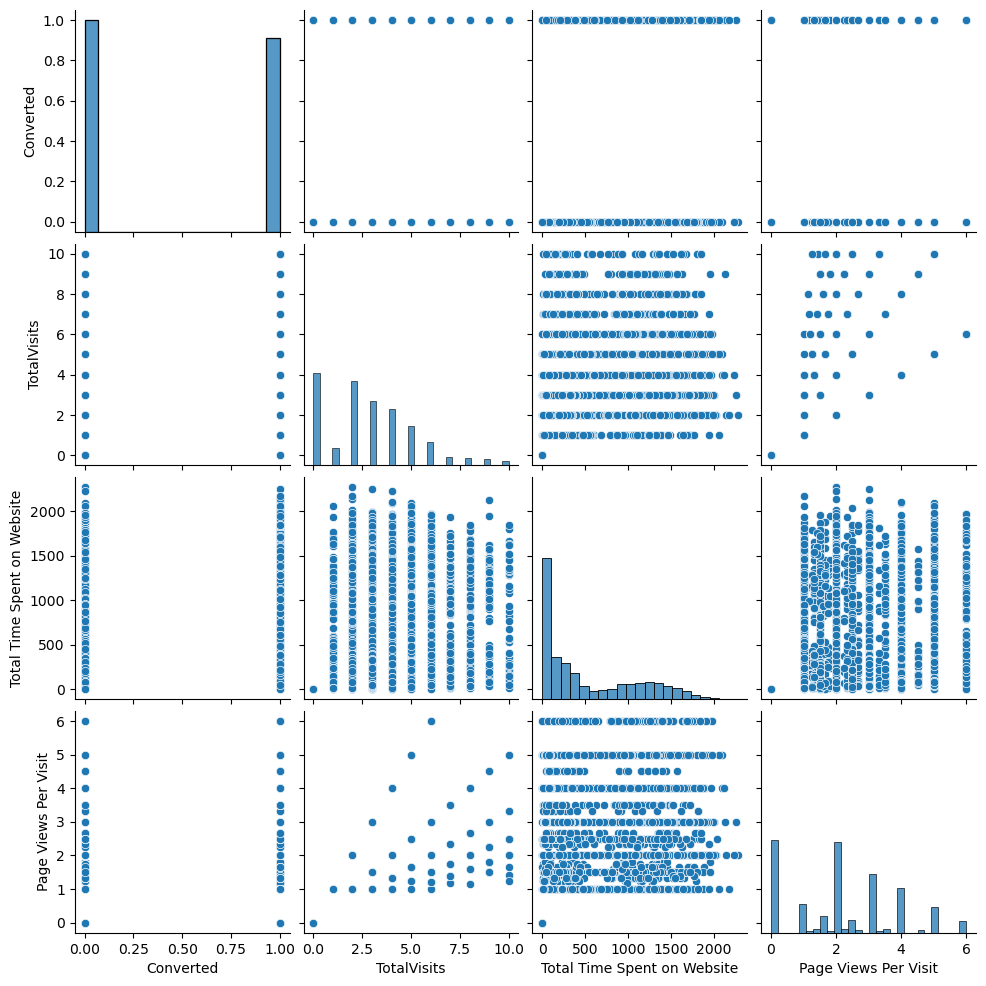

In [60]:
# Creating Scatter plot
plt.figure(figsize = (10,20))
sns.pairplot(df)
plt.show()

## Correlation

In [62]:
# Creating Correlation Matrix
res = df[num_col].corr().round(3)
res

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
Converted,1.00,-0.01,0.29,-0.08
TotalVisits,-0.01,1.00,0.39,0.76
Total Time Spent on Website,0.29,0.39,1.00,0.38
Page Views Per Visit,-0.08,0.76,0.38,1.00


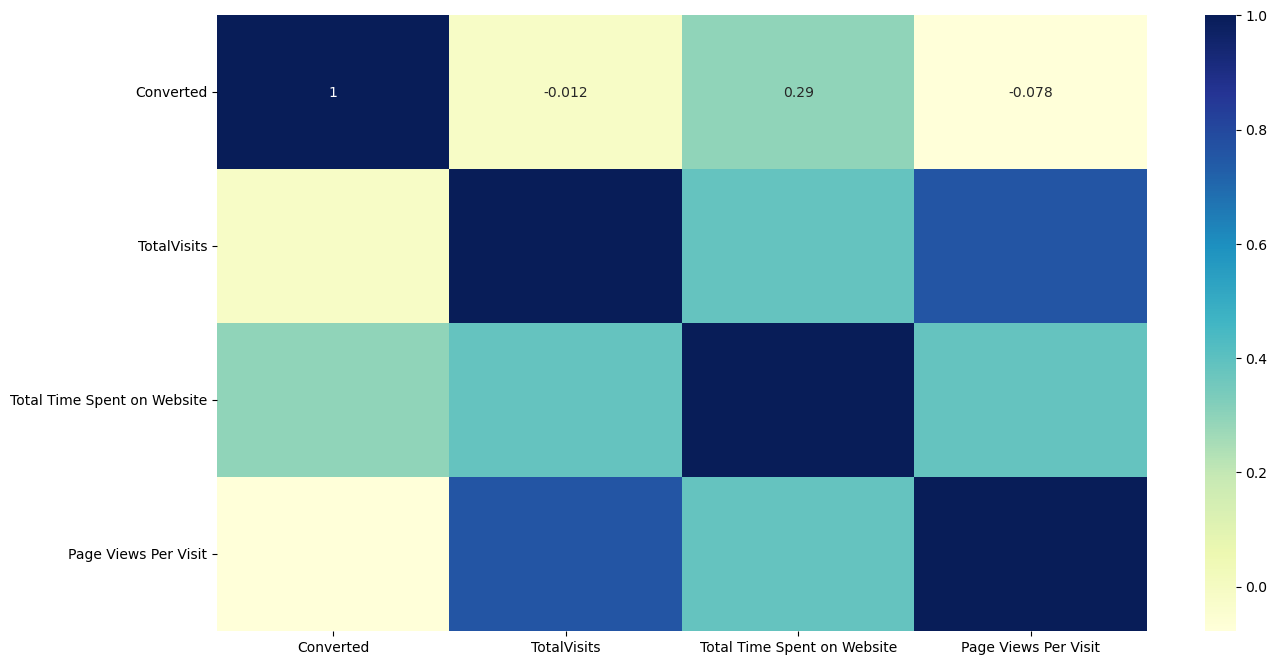

In [63]:
# Creating Heatmap
plt.figure(figsize = (15,8))
sns.heatmap(res, annot = True, cmap = 'YlGnBu')
plt.show()

# 4. Data Preparation

## Creating dummy variables

In [66]:
# Creating Object column list
obj_col = df.select_dtypes(exclude = ['int','float','datetime64']).columns.tolist()

In [67]:
# Creating Dummy variables
dummy = pd.get_dummies(df[obj_col], drop_first = True).astype('int')
dummy.head()

,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_testone,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,How did you hear about X Education_Email,How did you hear about X Education_Multiple Sources,How did you hear about X Education_Online Search,How did you hear about X Education_Other,How did you hear about X Education_SMS,How did you hear about X Education_Select,How did you hear about X Education_Social Media,How did you hear about X Education_Student of SomeSchool,How did you hear about X Education_Word Of Mouth,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Search_Yes,Digital Advertisement_Yes,Lead Profile_Lateral Student,Lead Profile_Other Leads,Lead Profile_Potential Lead,Lead Profile_Select,Lead Profile_Student of SomeSchool,A free copy of Mastering The Interview_Yes,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked,Specialization_Group_General Management,Specialization_Group_Healthcare and Specialized Sectors,Specialization_Group_Human Resources,Specialization_Group_International Business,Specialization_Group_Marketing and Advertising,Specialization_Group_Not Available,Specialization_Group_Supply Chain and Operations,Specialization_Group_Technology and IT,Specialization_Group_Travel and Hospitality
0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [68]:
# Merging DataFrames
df = pd.concat([df,dummy], axis = 1)

In [69]:
# Dropping object columns
df.drop(obj_col, axis = 1, inplace = True)

In [70]:
# Checking DataFrame
df.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_testone,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,How did you hear about X Education_Email,How did you hear about X Education_Multiple Sources,How did you hear about X Education_Online Search,How did you hear about X Education_Other,How did you hear about X Education_SMS,How did you hear about X Education_Select,How did you hear about X Education_Social Media,How did you hear about X Education_Student of SomeSchool,How did you hear about X Education_Word Of Mouth,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Search_Yes,Digital Advertisement_Yes,Lead Profile_Lateral Student,Lead Profile_Other Leads,Lead Profile_Potential Lead,Lead Profile_Select,Lead Profile_Student of SomeSchool,A free copy of Mastering The Interview_Yes,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked,Specialization_Group_General Management,Specialization_Group_Healthcare and Specialized Sectors,Specialization_Group_Human Resources,Specialization_Group_International Business,Specialization_Group_Marketing and Advertising,Specialization_Group_Not Available,Specialization_Group_Supply Chain and Operations,Specialization_Group_Technology and IT,Specialization_Group_Travel and Hospitality
0,0,0.00,0,0.00,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,0,5.00,674,2.50,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,1,2.00,1532,2.00,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,0,1.00,305,1.00,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,1,2.00,1428,1.00,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


## Train - Test Split

In [72]:
# Creating X and y
X = df.drop(['Converted'], axis = 1)
y = df['Converted']

In [73]:
# Train - Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state =100)

## Feature Scaling

In [75]:
# Scaling numerical columns using MinMaxScaler
scaler = MinMaxScaler()
X_train[['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']])

# 5. Model Building

## Model 1

In [78]:
# Creating 1st Model
logreg = LogisticRegression()
rfe = RFE(logreg,n_features_to_select = 15)
rfe = rfe.fit(X_train, y_train)

In [79]:
rfe.support_
list(zip(X_train.columns, rfe.support_, rfe.ranking_))
col = X_train.columns[rfe.support_]
col

Index(['TotalVisits', 'Total Time Spent on Website',
       'Lead Origin_Lead Add Form', 'Lead Source_Olark Chat',
       'Lead Source_Welingak Website', 'Last Activity_Converted to Lead',
       'Last Activity_Email Bounced', 'Last Activity_Had a Phone Conversation',
       'Last Activity_SMS Sent', 'What is your current occupation_Housewife',
       'What is your current occupation_Working Professional',
       'Lead Profile_Lateral Student', 'Lead Profile_Potential Lead',
       'Lead Profile_Student of SomeSchool',
       'Last Notable Activity_Unreachable'],
      dtype='object')

In [80]:
X_train_rfe = X_train[col]

In [81]:
X_train_rfe_sm = sm.add_constant(X_train_rfe)
logm1 = sm.GLM(y_train, X_train_rfe_sm, family = sm.families.Binomial())
res1 = logm1.fit()
res1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4123
Model:                            GLM   Df Residuals:                     4107
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1760.7
Date:                Sun, 15 Dec 2024   Deviance:                       3521.4
Time:                        01:18:04   Pearson chi2:                 4.01e+03
No. Iterations:                    23   Pseudo R-squ. (CS):             0.4115
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.7954      0.137    -20.377      0.000      -3.064      -2.527
TotalVisits                                              0.8869      0.242      3.665      0.000       0.413       1.361
Total Time Spent on Website                              4.4226      0.204     21.638      0.000       4.022       4.823
Lead Origin_Lead Add Form                                3.2757      0.245     13.387      0.000       2.796       3.755
Lead Source_Olark Chat                                   1.8303      0.152     12.033      0.000       1.532       2.128
Lead Source_Welingak Website                            23.2655   1.34e+04      0.002      0.999   -2.63e+04    2.64e+04
Last Activity_Converted to Lead                         -1.1059      0.261     -4.230      0.000      -1.618      -0.593
Last Activity_Email Bounced                             -1.7556      0.413     -4.247      0.000      -2.566      -0.945
Last Activity_Had a Phone Conversation                   2.2374      0.887      2.522      0.012       0.499       3.976
Last Activity_SMS Sent                                   1.1751      0.090     13.083      0.000       0.999       1.351
What is your current occupation_Housewife               25.0621   3.73e+04      0.001      0.999    -7.3e+04    7.31e+04
What is your current occupation_Working Professional     2.4388      0.206     11.831      0.000       2.035       2.843
Lead Profile_Lateral Student                            23.6854   3.24e+04      0.001      0.999   -6.35e+04    6.35e+04
Lead Profile_Potential Lead                              1.4630      0.105     13.914      0.000       1.257       1.669
Lead Profile_Student of SomeSchool                      -2.3782      0.460     -5.166      0.000      -3.281      -1.476
Last Notable Activity_Unreachable                        3.1045      1.073      2.892      0.004       1.001       5.208
========================================================================================================================
"""

In [82]:
# Checking VIF
vif = pd.DataFrame()
df1 = X_train_rfe_sm.drop('const', axis = 1)
vif['feature'] = df1.columns
vif['VIF'] = [variance_inflation_factor(df1.values, i) for i in range(df1.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,feature,VIF
1,Total Time Spent on Website,2.21
0,TotalVisits,2.16
2,Lead Origin_Lead Add Form,1.67
8,Last Activity_SMS Sent,1.56
12,Lead Profile_Potential Lead,1.52
4,Lead Source_Welingak Website,1.34
10,What is your current occupation_Working Profes...,1.26
3,Lead Source_Olark Chat,1.09
13,Lead Profile_Student of SomeSchool,1.05
5,Last Activity_Converted to Lead,1.03


In [83]:
# Dropping 'Lead Source_Welingak Website' as it high p-values
X_train_rfe = X_train_rfe.drop('Lead Source_Welingak Website', axis = 1)
X_train_rfe_sm = sm.add_constant(X_train_rfe)

## Model 2

In [85]:
# Creating 2nd Model
logm2 = sm.GLM(y_train, X_train_rfe_sm, family = sm.families.Binomial())
res2 = logm2.fit()
res2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4123
Model:                            GLM   Df Residuals:                     4108
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1776.8
Date:                Sun, 15 Dec 2024   Deviance:                       3553.7
Time:                        01:18:05   Pearson chi2:                 4.27e+03
No. Iterations:                    22   Pseudo R-squ. (CS):             0.4069
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.7786      0.137    -20.330      0.000      -3.047      -2.511
TotalVisits                                              0.8826      0.241      3.656      0.000       0.409       1.356
Total Time Spent on Website                              4.4148      0.204     21.641      0.000       4.015       4.815
Lead Origin_Lead Add Form                                3.8938      0.238     16.341      0.000       3.427       4.361
Lead Source_Olark Chat                                   1.8225      0.152     12.008      0.000       1.525       2.120
Last Activity_Converted to Lead                         -1.1035      0.261     -4.234      0.000      -1.614      -0.593
Last Activity_Email Bounced                             -1.7553      0.413     -4.255      0.000      -2.564      -0.947
Last Activity_Had a Phone Conversation                   2.2304      0.886      2.519      0.012       0.495       3.966
Last Activity_SMS Sent                                   1.1692      0.089     13.075      0.000       0.994       1.344
What is your current occupation_Housewife               23.9893   2.23e+04      0.001      0.999   -4.36e+04    4.37e+04
What is your current occupation_Working Professional     2.4125      0.206     11.683      0.000       2.008       2.817
Lead Profile_Lateral Student                            22.7468   2.03e+04      0.001      0.999   -3.97e+04    3.98e+04
Lead Profile_Potential Lead                              1.4206      0.105     13.517      0.000       1.215       1.627
Lead Profile_Student of SomeSchool                      -2.4136      0.467     -5.172      0.000      -3.328      -1.499
Last Notable Activity_Unreachable                        3.1004      1.073      2.890      0.004       0.997       5.203
========================================================================================================================
"""

In [86]:
# Checking VIF
vif = pd.DataFrame()
df1 = X_train_rfe_sm.drop('const', axis = 1)
vif['feature'] = df1.columns
vif['VIF'] = [variance_inflation_factor(df1.values, i) for i in range(df1.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,feature,VIF
1,Total Time Spent on Website,2.21
0,TotalVisits,2.15
7,Last Activity_SMS Sent,1.56
11,Lead Profile_Potential Lead,1.49
2,Lead Origin_Lead Add Form,1.29
9,What is your current occupation_Working Profes...,1.24
3,Lead Source_Olark Chat,1.09
12,Lead Profile_Student of SomeSchool,1.05
4,Last Activity_Converted to Lead,1.03
5,Last Activity_Email Bounced,1.03


In [87]:
# Dropping 'What is your current occupation_Housewife' as it high p-values
X_train_rfe = X_train_rfe.drop('What is your current occupation_Housewife', axis = 1)
X_train_rfe_sm = sm.add_constant(X_train_rfe)

## Model 3

In [89]:
# Creating 3rd Model
logm3 = sm.GLM(y_train, X_train_rfe_sm, family = sm.families.Binomial())
res3 = logm3.fit()
res3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4123
Model:                            GLM   Df Residuals:                     4109
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1783.7
Date:                Sun, 15 Dec 2024   Deviance:                       3567.4
Time:                        01:18:05   Pearson chi2:                 4.29e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.4049
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.7549      0.136    -20.247      0.000      -3.022      -2.488
TotalVisits                                              0.8619      0.241      3.576      0.000       0.389       1.334
Total Time Spent on Website                              4.4108      0.204     21.664      0.000       4.012       4.810
Lead Origin_Lead Add Form                                3.8996      0.238     16.391      0.000       3.433       4.366
Lead Source_Olark Chat                                   1.8044      0.151     11.923      0.000       1.508       2.101
Last Activity_Converted to Lead                         -1.1189      0.260     -4.296      0.000      -1.629      -0.608
Last Activity_Email Bounced                             -1.7687      0.413     -4.288      0.000      -2.577      -0.960
Last Activity_Had a Phone Conversation                   2.2151      0.885      2.502      0.012       0.480       3.950
Last Activity_SMS Sent                                   1.1560      0.089     12.954      0.000       0.981       1.331
What is your current occupation_Working Professional     2.4037      0.206     11.647      0.000       1.999       2.808
Lead Profile_Lateral Student                            21.7303   1.23e+04      0.002      0.999   -2.41e+04    2.41e+04
Lead Profile_Potential Lead                              1.4167      0.105     13.505      0.000       1.211       1.622
Lead Profile_Student of SomeSchool                      -2.4238      0.467     -5.195      0.000      -3.338      -1.509
Last Notable Activity_Unreachable                        3.0894      1.073      2.879      0.004       0.986       5.192
========================================================================================================================
"""

In [90]:
# Checking VIF
vif = pd.DataFrame()
df1 = X_train_rfe_sm.drop('const', axis = 1)
vif['feature'] = df1.columns
vif['VIF'] = [variance_inflation_factor(df1.values, i) for i in range(df1.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,feature,VIF
1,Total Time Spent on Website,2.20
0,TotalVisits,2.15
7,Last Activity_SMS Sent,1.55
10,Lead Profile_Potential Lead,1.49
2,Lead Origin_Lead Add Form,1.28
8,What is your current occupation_Working Profes...,1.24
3,Lead Source_Olark Chat,1.09
11,Lead Profile_Student of SomeSchool,1.05
4,Last Activity_Converted to Lead,1.03
5,Last Activity_Email Bounced,1.03


In [91]:
# Dropping 'Lead Profile_Lateral Student' as it high p-values
X_train_rfe = X_train_rfe.drop('Lead Profile_Lateral Student', axis = 1)
X_train_rfe_sm = sm.add_constant(X_train_rfe)

## Model 4

In [93]:
# Creating 4th Model
logm4 = sm.GLM(y_train, X_train_rfe_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4123
Model:                            GLM   Df Residuals:                     4110
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1788.4
Date:                Sun, 15 Dec 2024   Deviance:                       3576.8
Time:                        01:18:05   Pearson chi2:                 4.32e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.4035
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.7452      0.136    -20.211      0.000      -3.011      -2.479
TotalVisits                                              0.8474      0.241      3.517      0.000       0.375       1.320
Total Time Spent on Website                              4.4334      0.203     21.800      0.000       4.035       4.832
Lead Origin_Lead Add Form                                3.9362      0.238     16.559      0.000       3.470       4.402
Lead Source_Olark Chat                                   1.7998      0.151     11.911      0.000       1.504       2.096
Last Activity_Converted to Lead                         -1.1326      0.261     -4.347      0.000      -1.643      -0.622
Last Activity_Email Bounced                             -1.7798      0.413     -4.313      0.000      -2.589      -0.971
Last Activity_Had a Phone Conversation                   2.2310      0.879      2.539      0.011       0.509       3.953
Last Activity_SMS Sent                                   1.1475      0.089     12.871      0.000       0.973       1.322
What is your current occupation_Working Professional     2.4088      0.206     11.685      0.000       2.005       2.813
Lead Profile_Potential Lead                              1.4079      0.105     13.420      0.000       1.202       1.613
Lead Profile_Student of SomeSchool                      -2.4377      0.467     -5.218      0.000      -3.353      -1.522
Last Notable Activity_Unreachable                        3.0838      1.073      2.874      0.004       0.981       5.187
========================================================================================================================
"""

In [94]:
# Checking VIF
vif = pd.DataFrame()
df1 = X_train_rfe_sm.drop('const', axis = 1)
vif['feature'] = df1.columns
vif['VIF'] = [variance_inflation_factor(df1.values, i) for i in range(df1.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,feature,VIF
1,Total Time Spent on Website,2.20
0,TotalVisits,2.15
7,Last Activity_SMS Sent,1.55
9,Lead Profile_Potential Lead,1.49
2,Lead Origin_Lead Add Form,1.27
8,What is your current occupation_Working Profes...,1.24
3,Lead Source_Olark Chat,1.09
10,Lead Profile_Student of SomeSchool,1.05
4,Last Activity_Converted to Lead,1.03
5,Last Activity_Email Bounced,1.03


# 6. Predicting Values on training set

In [96]:
y_train_pred = res.predict(X_train_rfe_sm)
y_train_pred = y_train_pred.values.reshape(-1)

In [97]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values,'Converted_prob': y_train_pred})
y_train_pred_final.head()

,Converted,Converted_prob
0,0,0.02
1,0,0.03
2,0,0.10
3,0,0.84
4,1,0.78


In [98]:
y_train_pred_final['predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)

In [99]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted,y_train_pred_final.predicted)
print(confusion)
print('-'*50)
TP = confusion[1,1]
TN = confusion[0,0]
FP = confusion[0,1]
FN = confusion[1,0]
# Calculating the sensitivity
print('Sensitivity =', TP/float(TP+FN))
# Calculating the specificity
print('Specificity =', TN/float(TN+FP))

[[1777  378]
 [ 437 1531]]
--------------------------------------------------
Sensitivity = 0.7779471544715447
Specificity = 0.8245939675174014


1. The sensitivity and specificity is good for the model
2. For the problem in hand we should look to maximise sensitivity

In [101]:
print(metrics.accuracy_score(y_train_pred_final.Converted,y_train_pred_final.predicted))

0.8023284016492845


1. Model has about 80% accuracy with cutoff = 0.5

## ROC

In [104]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()
    return None

In [105]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_prob, drop_intermediate = False )

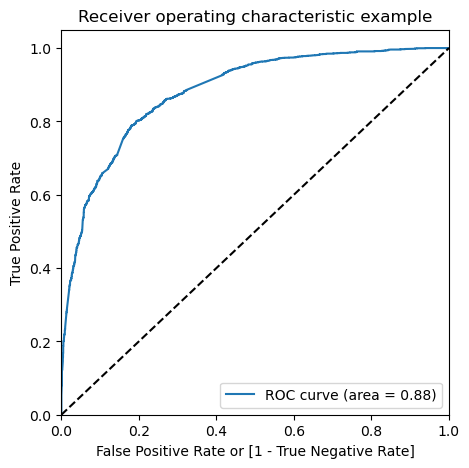

In [106]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

In [107]:
# Creating columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.02,0,1,0,0,0,0,0,0,0,0,0
1,0,0.03,0,1,0,0,0,0,0,0,0,0,0
2,0,0.10,0,1,0,0,0,0,0,0,0,0,0
3,0,0.84,1,1,1,1,1,1,1,1,1,1,0
4,1,0.78,1,1,1,1,1,1,1,1,1,0,0


In [108]:
# Calculating accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

      prob  accuracy  sensi  speci
0.00  0.00      0.48   1.00   0.00
0.10  0.10      0.61   0.99   0.27
0.20  0.20      0.72   0.96   0.50
0.30  0.30      0.78   0.87   0.70
0.40  0.40      0.80   0.82   0.77
0.50  0.50      0.80   0.78   0.82
0.60  0.60      0.78   0.68   0.88
0.70  0.70      0.77   0.59   0.93
0.80  0.80      0.73   0.47   0.95
0.90  0.90      0.68   0.35   0.98


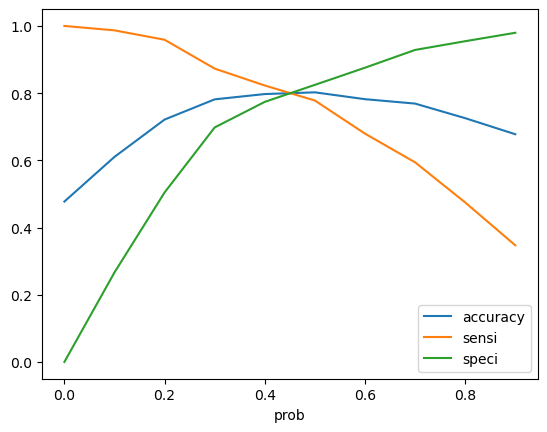

In [109]:
# Ploting accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

1. From the curve above, 0.4 is the optimum point to take it as a cutoff probability as it gives high sensitivity and specificity.

In [111]:
# final_predicted values based on optimal cutoff
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_prob.map( lambda x: 1 if x > 0.4 else 0)
y_train_pred_final.head()

,Converted,Converted_prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.02,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0.03,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0.10,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0.84,1,1,1,1,1,1,1,1,1,1,0,1
4,1,0.78,1,1,1,1,1,1,1,1,1,0,0,1


In [112]:
# Overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.7972350230414746

1. The overall accuracy is still about 80%

In [114]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted,y_train_pred_final.final_predicted)
print(confusion2)
print('-'*50)

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

TP = confusion2[1,1]
TN = confusion2[0,0]
FP = confusion2[0,1]
FN = confusion2[1,0]

# Calculating the sensitivity
print('Sensitivity =', TP/float(TP+FN))
# Calculating the specificity
print('Specificity =', TN/float(TN+FP))

[[1668  487]
 [ 349 1619]]
--------------------------------------------------
Sensitivity = 0.8226626016260162
Specificity = 0.774013921113689


1. The final model with 0.4 as cutoff gives good accuracy and sensitivity
2. Sensitivity is more important to our business problem as leads that are going to get converted should not be missed
3. Specificity of the model is also good

## Precision and Recall

In [117]:
confusion3 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion3

array([[1668,  487],
       [ 349, 1619]], dtype=int64)

In [118]:
precision_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.7687559354226021

In [119]:
recall_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8226626016260162

In [120]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

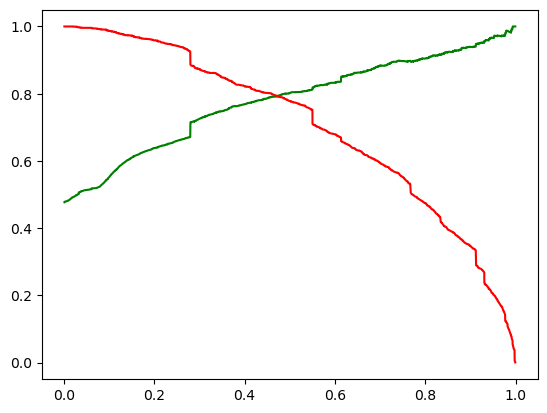

In [121]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

# 7. Making Prediction on test set

In [123]:
X_test[['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']])

In [124]:
X_train_rfe_sm.columns

Index(['const', 'TotalVisits', 'Total Time Spent on Website',
       'Lead Origin_Lead Add Form', 'Lead Source_Olark Chat',
       'Last Activity_Converted to Lead', 'Last Activity_Email Bounced',
       'Last Activity_Had a Phone Conversation', 'Last Activity_SMS Sent',
       'What is your current occupation_Working Professional',
       'Lead Profile_Potential Lead', 'Lead Profile_Student of SomeSchool',
       'Last Notable Activity_Unreachable'],
      dtype='object')

In [125]:
col_list_final = X_train_rfe_sm.columns.drop('const').tolist()
col_list_final

['TotalVisits',
 'Total Time Spent on Website',
 'Lead Origin_Lead Add Form',
 'Lead Source_Olark Chat',
 'Last Activity_Converted to Lead',
 'Last Activity_Email Bounced',
 'Last Activity_Had a Phone Conversation',
 'Last Activity_SMS Sent',
 'What is your current occupation_Working Professional',
 'Lead Profile_Potential Lead',
 'Lead Profile_Student of SomeSchool',
 'Last Notable Activity_Unreachable']

In [126]:
X_test = X_test[col_list_final]
X_test.head()

,TotalVisits,Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Had a Phone Conversation,Last Activity_SMS Sent,What is your current occupation_Working Professional,Lead Profile_Potential Lead,Lead Profile_Student of SomeSchool,Last Notable Activity_Unreachable
5217,0.30,0.25,0,0,0,0,0,0,0,0,0,0
6657,0.40,0.15,0,0,0,0,0,0,0,0,0,0
6172,0.40,0.10,0,0,0,0,0,1,0,0,0,0
3060,0.40,0.68,0,0,0,0,0,1,0,0,0,0
6161,0.30,0.04,0,0,0,0,0,0,0,0,0,0


In [127]:
X_test_sm = sm.add_constant(X_test)
y_test_pred = res.predict(X_test_sm)

In [128]:
y_test_pred[:10]

5217   0.20
6657   0.15
6172   0.31
3060   0.85
6161   0.09
4450   0.05
2014   0.98
2694   0.55
8582   0.50
8972   0.81
dtype: float64

In [129]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [130]:
y_pred_1.head()

,0
5217,0.20
6657,0.15
6172,0.31
3060,0.85
6161,0.09


In [131]:
y_test.head()

5217    1
6657    0
6172    1
3060    1
6161    0
Name: Converted, dtype: int64

In [132]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [133]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1], axis=1)

In [134]:
y_pred_final.head()

,Converted,0
5217,1,0.20
6657,0,0.15
6172,1,0.31
3060,1,0.85
6161,0,0.09


In [135]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_prob'})

In [136]:
# Adding final predicted value
y_pred_final['final_predicted'] = y_pred_final.Converted_prob.map(lambda x: 1 if x > 0.4 else 0)

In [137]:
# Overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.792420814479638

In [138]:
confusion4 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion4

array([[720, 199],
       [168, 681]], dtype=int64)

In [139]:
TP = confusion4[1,1] # true positive 
TN = confusion4[0,0] # true negatives
FP = confusion4[0,1] # false positives
FN = confusion4[1,0] # false negatives

In [140]:
# Calculating sensitivity
TP / float(TP+FN)

0.8021201413427562

In [141]:
# Calculating specificity
TN / float(TN+FP)

0.7834602829162133

In [142]:
precision_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.7738636363636363

In [143]:
recall_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.8021201413427562

1. The model performs well on the test data as well with good accuracy and sensitivity

In [145]:
res.params.sort_values(ascending=False)

Total Time Spent on Website                             4.43
Lead Origin_Lead Add Form                               3.94
Last Notable Activity_Unreachable                       3.08
What is your current occupation_Working Professional    2.41
Last Activity_Had a Phone Conversation                  2.23
Lead Source_Olark Chat                                  1.80
Lead Profile_Potential Lead                             1.41
Last Activity_SMS Sent                                  1.15
TotalVisits                                             0.85
Last Activity_Converted to Lead                        -1.13
Last Activity_Email Bounced                            -1.78
Lead Profile_Student of SomeSchool                     -2.44
const                                                  -2.75
dtype: float64